<a href="https://colab.research.google.com/github/Xukay101/curso-data-science/blob/main/proyecto_final/Proyecto_Final_Flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Proyecto Final: Análisis de datos; Fidelización de clientes en empresa de telecomunicaciones"**

--- 

## Descripción

Predecir la pérdida de clientes es fundamental para que las empresas de telecomunicaciones puedan retener clientes de forma eficaz. Es más costoso adquirir nuevos clientes que retener a los existentes. Por este motivo, las grandes corporaciones de telecomunicaciones buscan desarrollar modelos para predecir qué clientes tienen más probabilidades de cambiar y tomar medidas en consecuencia.

En este proyecto, construimos un modelo para predecir la probabilidad de que un cliente abandone analizando sus características: (**1**) **información demográfica**, (**2**) **información de la cuenta** y (**3**) **información de los servicios**. El objetivo es obtener una solución basada en datos que permita reducir las tasas de abandono (**churn rate en ingles**) y, como consecuencia, aumentar la satisfacción del cliente y los ingresos de la empresa.


---

## Audiencia

Este proyecto está dirigido a cualquier persona interesada en aprender técnicas de análisis de datos y modelado predictivo. También podría ser útil para gerentes de empresas de servicios interesados en identificar los factores que influyen en la tasa de abandono de los clientes.

---

## Preguntas/Problema que buscamos resolver

El objetivo principal de este proyecto es desarrollar un modelo predictivo para identificar los clientes que tienen más probabilidades de abandonar la empresa de telecomunicaciones. Algunas preguntas específicas que buscamos responder son:

- ¿Cuáles son los factores que influyen en la tasa de abandono de los clientes?
- ¿Hay alguna relación entre la duración del contrato y la tasa de abandono?
- ¿Cómo afecta el tipo de servicio contratado a la tasa de abandono?
- ¿Qué tan precisos son los modelos de predicción para identificar a los clientes con mayor probabilidad de abandonar?

Para responder a estas preguntas, se realizará un análisis exploratorio de datos, se creará un modelo predictivo utilizando técnicas de aprendizaje automático y se evaluará su precisión. Además, se utilizarán técnicas de optimización de hiperparámetros para mejorar la precisión del modelo. Finalmente, se seleccionará el mejor modelo y se presentarán recomendaciones para reducir la tasa de abandono de los clientes. 

# **2. Importación de datos y librerias**

In [41]:
# Imports de bibliotecas para manipulación de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports de bibliotecas para modelado y aprendizaje automático
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score

## Conjunto de datos

El conjunto de datos utilizado en este artículo está disponible en Kaggle y consta de 21 columnas (variables independientes) que indican las características de los clientes de una ficticia corporación de telecomunicaciones. La columna de Churn (variable objetivo) indica si el cliente termino su contrato no. La clase `No` incluye a los clientes que no abandonaron la empresa el mes pasado, mientras que la clase `Sí` contiene a los clientes que decidieron terminar sus relaciones con la empresa. El objetivo del análisis es obtener **la relación entre las características del cliente y el abandono**.

## Lectura e importacion de datos

La primera etapa del análisis consiste en leer y almacenar los datos en un dataframe de Pandas utilizando la función `pandas.read_csv`.


In [2]:
# Importación de datos
df = pd.read_csv('https://raw.githubusercontent.com/a-lacruz/ds_coder/main/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Nombres de las variables
print("\nNombres de las variables: \n", df.columns)

# Valores únicos en las variables categóricas
for column in df.columns:
    print("\nFrecuencia de valores únicos de",'Columna: {} - Valores: {}'.format(column, df[column].unique()))


Nombres de las variables: 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Frecuencia de valores únicos de Columna: customerID - Valores: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Frecuencia de valores únicos de Columna: gender - Valores: ['Female' 'Male']

Frecuencia de valores únicos de Columna: SeniorCitizen - Valores: [0 1]

Frecuencia de valores únicos de Columna: Partner - Valores: ['Yes' 'No']

Frecuencia de valores únicos de Columna: Dependents - Valores: ['No' 'Yes']

Frecuencia de valores únicos de Columna: tenure - Valores: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46

# **3. Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio de datos consiste en analizar las principales características de un conjunto de datos normalmente mediante métodos de visualización y estadísticas resumidas. El objetivo es comprender los datos, descubrir patrones y anomalías y comprobar las suposiciones antes de realizar más evaluaciones.

Las variables del conjunto son las siguientes y como se indicaba previamente, se divide en tres grupos:

**(1) Informacion Demografica**

- `gender`: género del cliente.

- `SeniorCitizen`: indica si el cliente es un adulto mayor o no.

- `Partner`: indica si el cliente tiene una pareja o no.

- `Dependents`: indica si el cliente tiene dependientes o no.

**(2) Informacion de cuenta del cliente**

- `tenure`: indica la cantidad de meses que el cliente ha sido cliente de la empresa.

- `Contract`: indica el tipo de contrato que tiene el cliente (Month-to-month, One year, Two year).

- `PaperlessBilling`: indica si el cliente recibe facturas electrónicas o no.

- `PaymentMethod`: indica el método de pago que utiliza el cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

- `MonthlyCharges`: indica la cantidad que el cliente paga cada mes.

- `TotalCharges`: indica la cantidad total que el cliente ha pagado hasta la fecha.

**(3) Informacion de servicios**

- `PhoneService`: indica si el cliente tiene servicio telefónico o no.

- `MultipleLines`: indica si el cliente tiene múltiples líneas o no.

- `InternetService`: indica el tipo de servicio de Internet que tiene el cliente (DSL, Fiber optic, None).

- `OnlineSecurity`: indica si el cliente tiene seguridad en línea o no.

- `OnlineBackup`: indica si el cliente tiene backup en línea o no.

- `DeviceProtection`: indica si el cliente tiene protección de dispositivo o no.

- `TechSupport`: indica si el cliente tiene soporte técnico o no.

- `StreamingTV`: indica si el cliente tiene servicio de transmisión de televisión o no.

- `StreamingMovies`: indica si el cliente tiene servicio de transmisión de películas o no.

## 3.1 Información general sobre el conjunto de datos

En esta etapa, queremos conocer tanta informacion como sea posible acerca de la base de datos, aqui es donde metodos como `pandas.DataFrame.info` son utiles. Este metodo imprime un resumen informativo sobre la BBDD que incluye informacion como los nombres de las columnas y sus tipos de datos, la cantidad de valores non-null entre otros.

In [4]:
# Sumario de la base de datos
print("Resumen Dataset: ", df.info())

# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Como se muestra arriba, el conjunto de datos contiene 7043 observaciones y 21 columnas. Aparentemente, no hay valores nulos en el conjunto de datos; sin embargo, observamos que la columna `TotalCharges` fue detectada erróneamente como un **objeto**. Esta columna representa el importe total cobrado al cliente y es, por tanto, una variable numérica. Para un análisis más detallado, necesitamos transformar esta columna en un tipo de datos numérico. Para hacerlo, podemos usar la función `pd.to_numeric`. 

## 3.2 Transformacion y limpieza de datos

In [5]:
# Transformando la columna "TotalCharges" en datos numericos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

De forma predeterminada, esta función genera una excepción cuando ve datos no numéricos; sin embargo, usamos el argumento errores='coerce' para omitir esos casos y reemplazarlos con un NaN.

In [6]:
# Verificamos si tenemos valores nulos despues de la transformacion
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Vemos que ahora la columna `TotalCharges` tiene 11 valores nulos. Estas observaciones también tienen un `tenure` de 0, aunque `MontlyCharges` no es nulo para estas entradas. Esta información parecía contradictoria y, por lo tanto, decidí eliminar esas filas del conjunto de datos.

In [7]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)

In [8]:
# Remover la columna "customerID"
df.drop(columns='customerID', inplace=True)

La columna `customerID` es inútil para explicar si el cliente abandonará. Por lo tanto, eliminamos esta columna del conjunto de datos.

In [9]:
# Remover la palabra (automatic) de los nombres en los metodos de pago
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

Como tambien vimos arriba, algunas denominaciones de métodos de pago contienen entre paréntesis la palabra **automatic**. Estas denominaciones son demasiado largas para usarse como etiquetas en visualizaciones posteriores. Por lo tanto, eliminamos esta aclaración entre paréntesis de las entradas de la columna `PaymentMethod`.

In [10]:
# Verificamos el resultado de la modificacion previa
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [11]:
# resumen del dataset(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

Observamos que luego de las anteriores modificaciones en la BBDD, tenemos que la columna `TotalCharges`ahora es detectada como un valor numerico y no posee valores nulos, asi como tambien fue eliminada la columna `customerID`.

## 3.3 Visualizaciones

## Relación entre las variables categóricas y la tasa de abandono

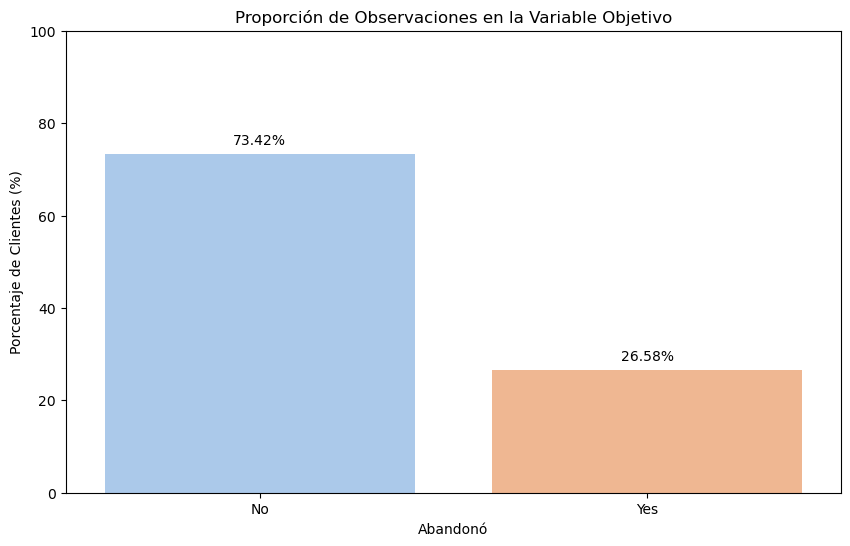

In [12]:
# Calcular la proporción de observaciones de la variable objetivo "Churn" en porcentaje
churn_proportions = df['Churn'].value_counts(normalize=True) * 100
# Graficar la proporción de observaciones de la variable objetivo "Churn" en porcentaje
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_proportions.index, y=churn_proportions.values, palette='pastel')
plt.text(0, churn_proportions[0] + 2, f'{churn_proportions[0]:.2f}%', ha='center')
plt.text(1, churn_proportions[1] + 2, f'{churn_proportions[1]:.2f}%', ha='center')
plt.title('Proporción de Observaciones en la Variable Objetivo')
plt.xlabel('Abandonó')
plt.ylabel('Porcentaje de Clientes (%)')
plt.ylim(0, 100)
plt.show()

El anterior gráfico de barras muestra el porcentaje de observaciones que corresponden a cada clase de la variable objetivo "churn": `si` y `no`. Se observa que tenemos un conjunto de datos desequilibrado porque ambas clases no están distribuidas equitativamente entre todas las observaciones, siendo el `No` la clase mayoritaria (73,42%). A la hora de modelar, este desequilibrio dará lugar a un gran número de falsos negativos, como veremos más adelante.

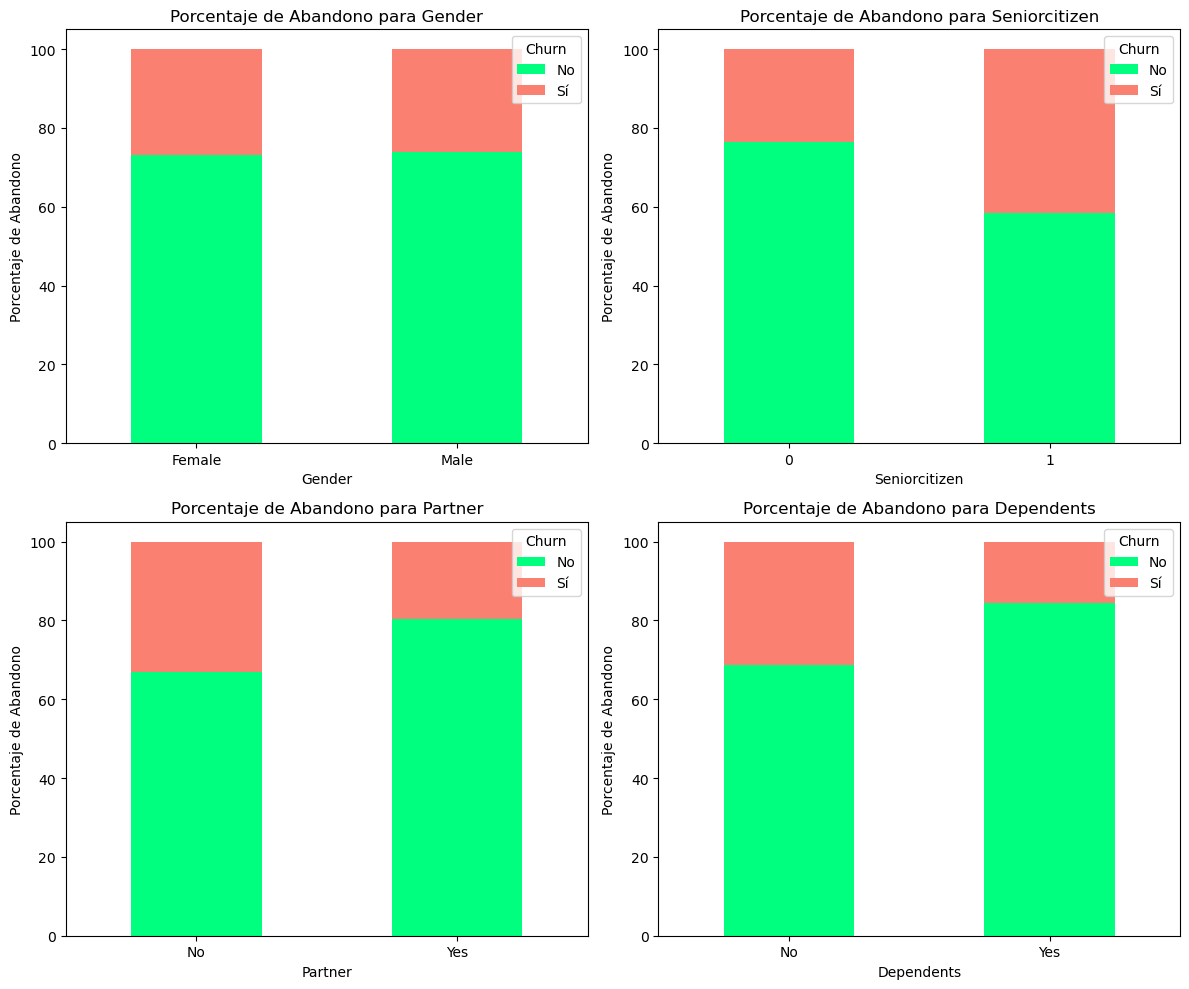

In [13]:
# Lista de atributos demográficos
demographic_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Crear subplots con una matriz de 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterar sobre los atributos demográficos y sus respectivos ejes
for attribute, ax in zip(demographic_attributes, axes.flatten()):
    # Calcular la proporción de Churn para cada categoría del atributo demográfico
    proportions = df.groupby(attribute)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
    
    # Mostrar el gráfico de barras apiladas en el eje actual
    proportions.plot(kind='bar', stacked=True, color=['springgreen', 'salmon'], ax=ax)
    
    # Ajustar etiquetas y títulos
    ax.set_title(f'Porcentaje de Abandono para {attribute.capitalize()}')
    ax.set_xlabel(attribute.capitalize())
    ax.set_ylabel('Porcentaje de Abandono')
    ax.legend(title='Churn', labels=['No', 'Sí'], loc='upper right')
    ax.tick_params(axis='x', rotation=0)  # Rotar etiquetas del eje x si es necesario

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

Podemos extraer las siguientes conclusiones analizando los atributos demográficos:

- La tasa de abandono de las personas mayores es casi el doble que la de los jóvenes.
- No esperamos que el género tenga un poder predictivo significativo. Un porcentaje similar de abandono se muestra tanto cuando un cliente es hombre como si es mujer.
- Los clientes con pareja abandonan menos que los que no la tienen.
- La tasa de abandono de los clientes con familiares, es casi el doble de los que no tienen.

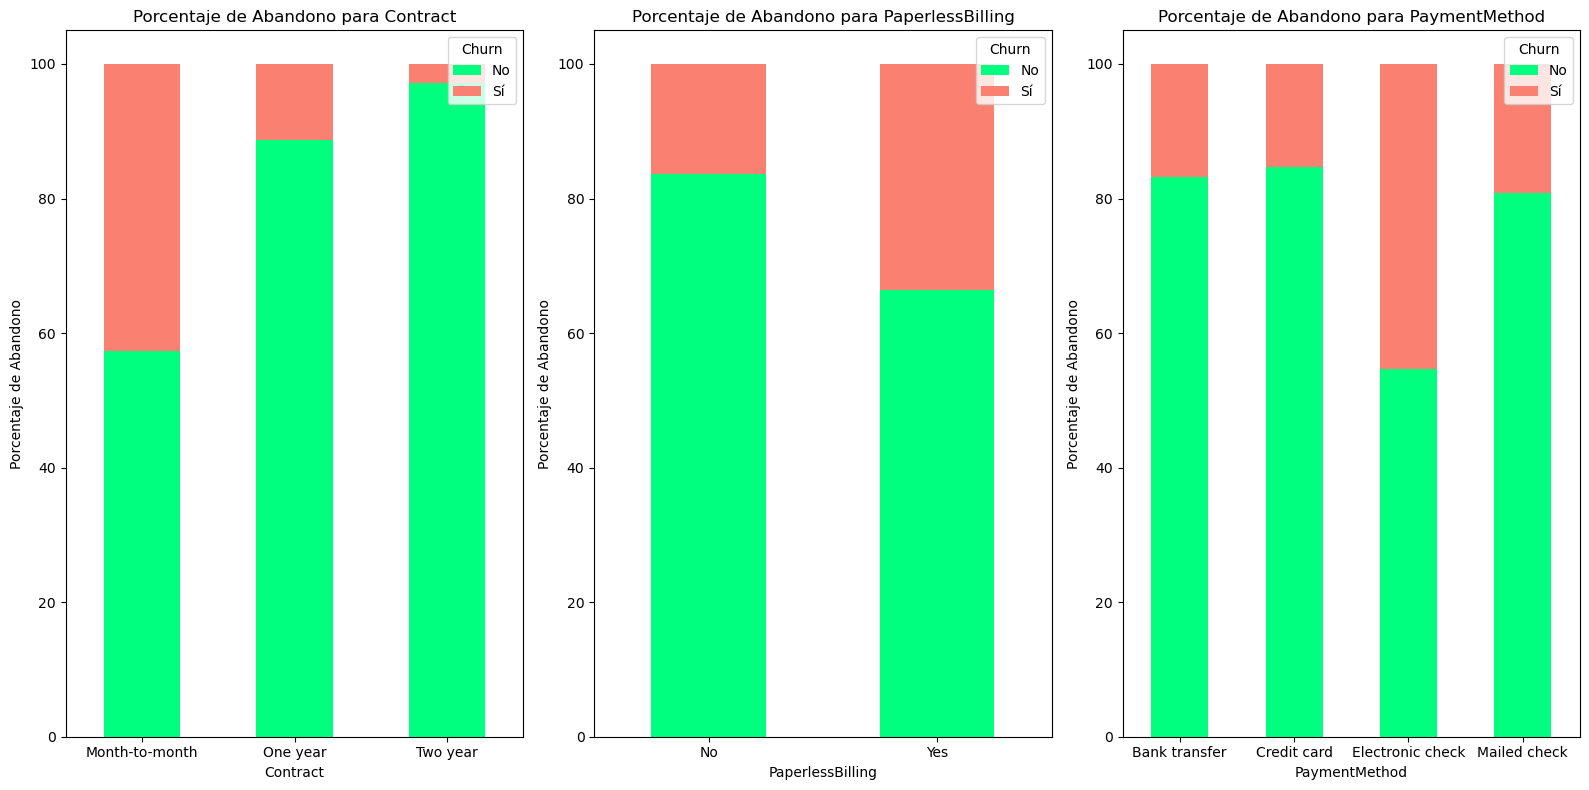

In [14]:
# Lista de atributos de información de la cuenta del cliente
account_info_attributes = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Crear subplots con una matriz de 2x2
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

# Iterar sobre los atributos de información de la cuenta y sus respectivos ejes
for attribute, ax in zip(account_info_attributes, axes.flatten()):
    # Calcular la proporción de Churn para cada categoría del atributo de información de la cuenta
    proportions = df.groupby(attribute)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
    
    # Mostrar el gráfico de barras apiladas en el eje actual
    proportions.plot(kind='bar', stacked=True, color=['springgreen', 'salmon'], ax=ax)
    
    # Ajustar etiquetas y títulos
    ax.set_title(f'Porcentaje de Abandono para {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Porcentaje de Abandono')
    ax.legend(title='Churn', labels=['No', 'Sí'], loc='upper right')
    ax.tick_params(axis='x', rotation=0)  # Rotar etiquetas del eje x si es necesario

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

Analizando los atributos de cuenta cliente podemos deducir que:

- Los clientes con contratos de mes a mes tienen tasas de abandono más altas en comparación con los clientes con contratos anuales.
- Los clientes que optaron por un cheque electrónico como método de pago tienen más probabilidades de abandonar su contrato.
- Los clientes suscritos a la facturación electrónica abandonan más que los que no lo están.

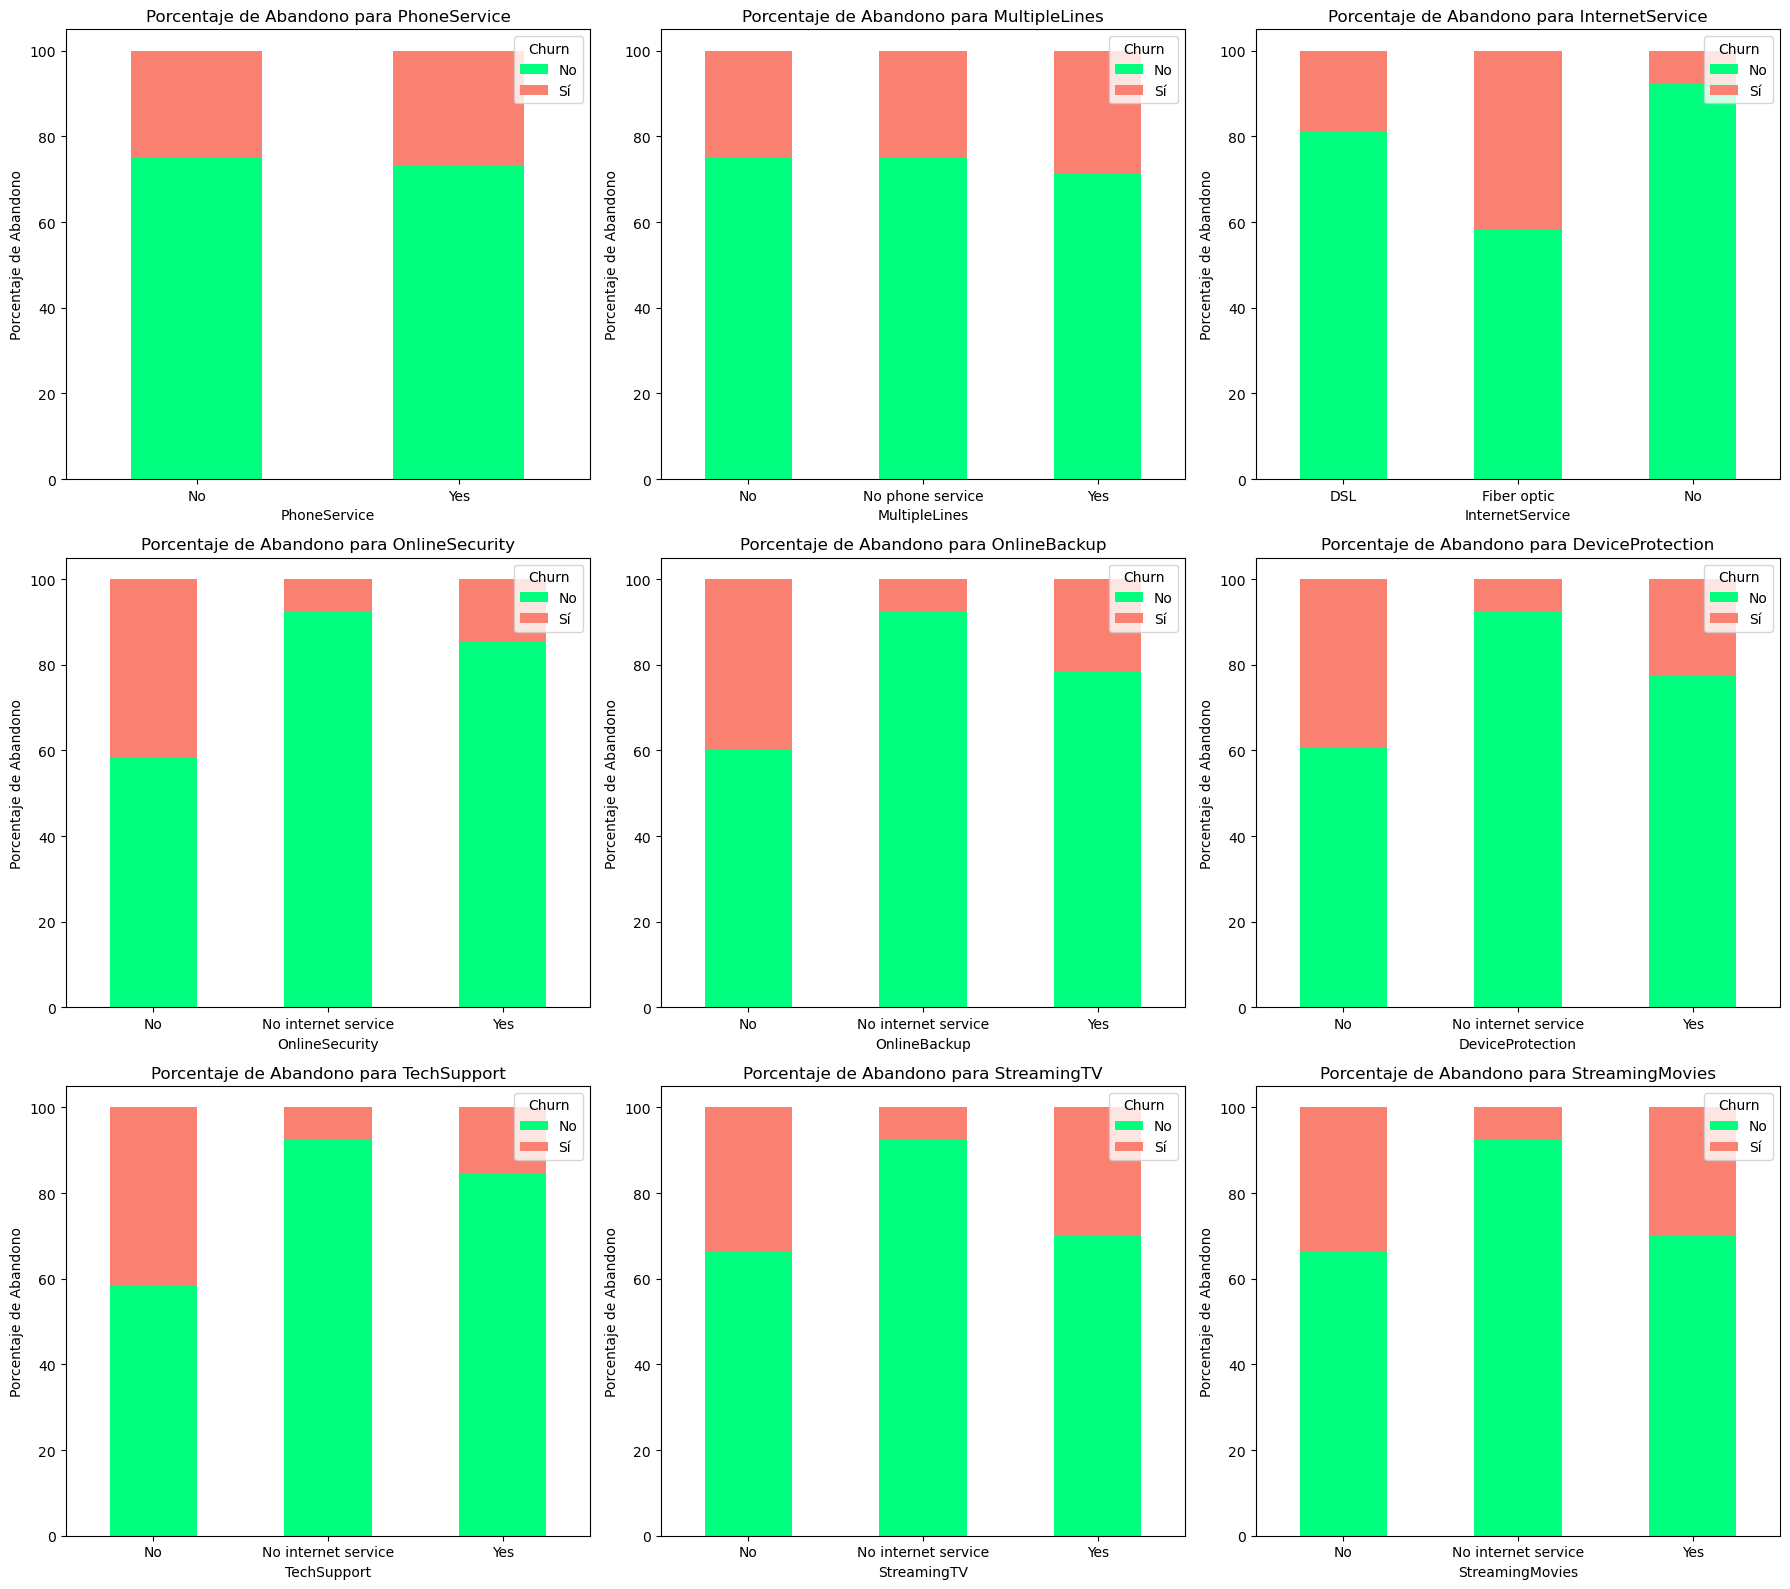

In [15]:
# Lista de atributos relacionados con los servicios contratados por el cliente
service_attributes = ['PhoneService', 'MultipleLines', 'InternetService', 
                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport', 'StreamingTV', 'StreamingMovies']

# Crear subplots con una matriz de 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 16))

# Iterar sobre los atributos de servicios y sus respectivos ejes
for attribute, ax in zip(service_attributes, axes.flatten()):
    # Calcular la proporción de Churn para cada categoría del atributo de servicios
    proportions = df.groupby(attribute)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
    
    # Mostrar el gráfico de barras apiladas en el eje actual
    proportions.plot(kind='bar', stacked=True, color=['springgreen', 'salmon'], ax=ax)
    
    # Ajustar etiquetas y títulos
    ax.set_title(f'Porcentaje de Abandono para {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Porcentaje de Abandono')
    ax.legend(title='Churn', labels=['No', 'Sí'], loc='upper right')
    ax.tick_params(axis='x', rotation=0)  # Rotar etiquetas del eje x si es necesario

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

Podemos extraer las siguientes conclusiones evaluando los atributos relacionados con los servicios contratados:

- No esperamos que los atributos `PhoneService` y `MultipleLines`tengan un poder predictivo significativo. El porcentaje de abandono de todas las clases en ambas variables es casi el mismo.
- Los clientes con `OnlineSecurity` abandonan menos que aquellos que no la tienen.
- Los clientes sin `TechSupport` tienden a abandonar con más frecuencia que aquellos con soporte técnico.

## Relación entre las variables numéricas y la tasa de abandono

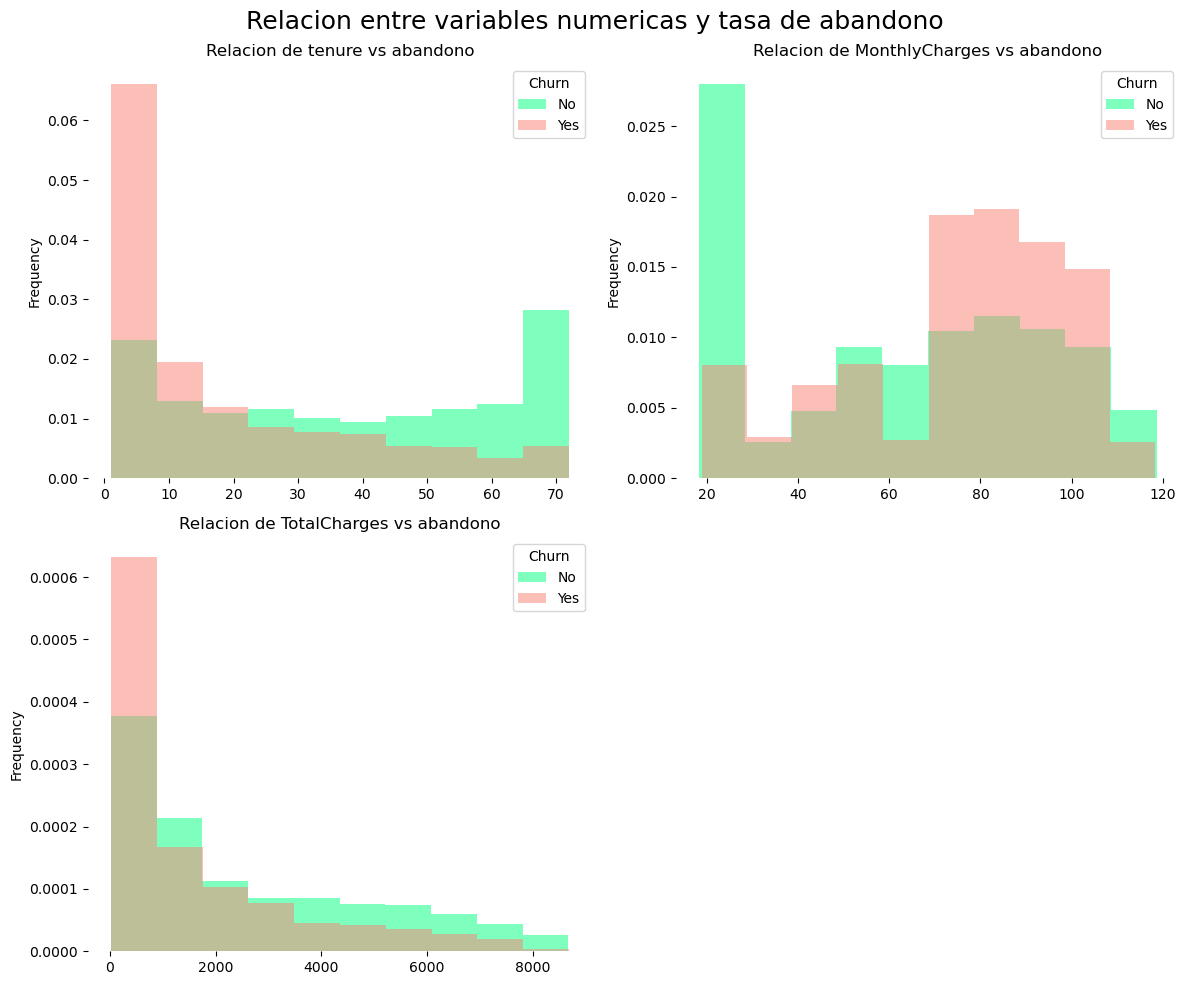

In [16]:
import math
# Definir las columnas para crear histogramas
columns_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Super título de la visualización
super_title = 'Relacion entre variables numericas y tasa de abandono'

# Definir el número de columnas y filas para subplots
number_of_columns = 2
number_of_rows = math.ceil(len(columns_to_plot) / number_of_columns)

# Crear la figura
fig, axes = plt.subplots(nrows=number_of_rows, ncols=number_of_columns, figsize=(12, 5 * number_of_rows)) 
fig.suptitle(super_title, fontsize=18, y=0.98)

# Iterar sobre las columnas de interés y sus respectivos ejes
for index, column in enumerate(columns_to_plot):
    # Calcular las coordenadas del subplot actual
    row_index = index // number_of_columns
    col_index = index % number_of_columns
    
    # Histogramas para cada clase (normalizado)
    df[df['Churn']=='No'][column].plot(kind='hist', ax=axes[row_index, col_index], density=True, alpha=0.5, color='springgreen', label='No')
    df[df['Churn']=='Yes'][column].plot(kind='hist', ax=axes[row_index, col_index], density=True, alpha=0.5, color='salmon', label='Yes')
    
    # Ajustar leyendas y títulos
    axes[row_index, col_index].legend(loc='upper right', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), title='Churn', fancybox=True)
    axes[row_index, col_index].set_title('Relacion de ' + column + ' vs abandono', fontsize=12, loc='center')
    axes[row_index, col_index].tick_params(rotation='auto')

    # Eliminar el borde del gráfico
    spine_names = ('top', 'right', 'bottom', 'left')
    for spine_name in spine_names:
        axes[row_index, col_index].spines[spine_name].set_visible(False)
        
# Eliminar ejes y marco para la posición 2-2
axes[1, 1].axis('off')

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()


Podemos extraer las siguientes conclusiones analizando los histogramas anteriores:

- La tasa de abandono tiende a ser mayor cuando los cargos mensuales son altos.
- Los nuevos clientes (tenure = low) tienen más probabilidades de abandonar.
- Los clientes con cargos totales elevados tienen menos probabilidades de abandonar la empresa.

## 3.4 Análisis específicos para responder a las preguntas de investigación

Luego de realizar un análisis exhaustivo de los datos, se pueden identificar varios factores que influyen en la tasa de abandono de los clientes. En primer lugar, la duración del contrato parece ser un factor clave, ya que los clientes con contratos más cortos tienen una tasa de abandono significativamente mayor que los clientes con contratos más largos. Otro factor importante es el tipo de servicio contratado, donde los clientes que contratan servicios de Internet de fibra óptica tienen una tasa de abandono más alta en comparación con los clientes que contratan servicios de DSL o sin conexión a Internet.

También se puede observar que los clientes que tienen servicios de seguridad en línea como "OnlineSecurity" o "DeviceProtection" tienen una tasa de abandono más baja que los clientes que no tienen estos servicios. Además, los clientes que utilizan servicios de pago electrónicos como "Electronic check" tienen una tasa de abandono más alta que los clientes que utilizan otros métodos de pago.

### Pregunta: ¿Hay alguna relación entre la duración del contrato y la tasa de abandono?

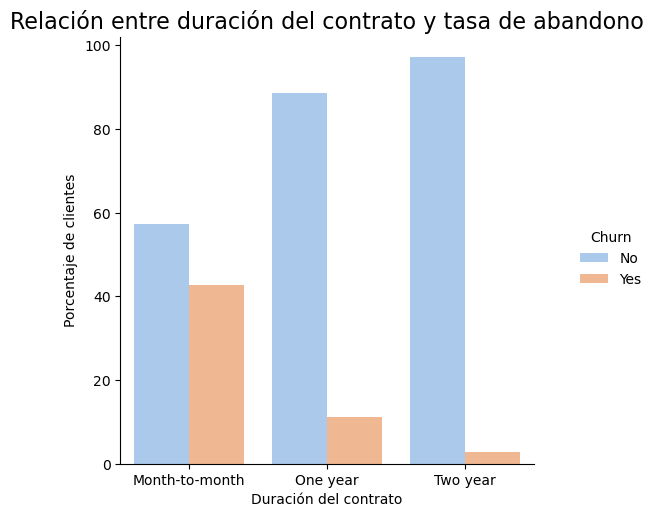

In [17]:
# Dataframe con tasa de abandono por cada tipo de contrato
contract_churn = df.groupby(['Contract', 'Churn']).size().reset_index(name='counts')
contract_churn['percent'] = contract_churn.groupby(['Contract'])['counts'].transform(lambda x: 100 * x / float(x.sum()))

# Utilizando sns.catplot directamente
sns.catplot(x='Contract', y='percent', hue='Churn', data=contract_churn, kind='bar', palette='pastel')
plt.title('Relación entre duración del contrato y tasa de abandono', fontsize=16)
plt.xlabel('Duración del contrato')
plt.ylabel('Porcentaje de clientes')
plt.show()


En el grafico previo observamos que:

- Los clientes con contratos de mes a mes tienen tasas de abandono más altas en comparación con los clientes con contratos anuales y multianuales.

### Pregunta: ¿Cómo afecta el tipo de servicio contratado a la tasa de abandono?

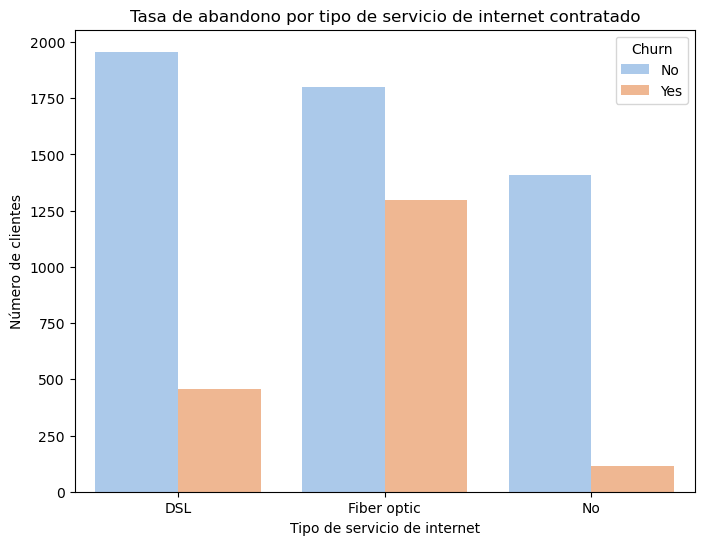

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='pastel')
plt.title('Tasa de abandono por tipo de servicio de internet contratado')
plt.xlabel('Tipo de servicio de internet')
plt.ylabel('Número de clientes')
plt.show()

Podemos observar que los clientes que contratan fibra óptica son los que tienen mayor tasa de abandono, seguidos de los clientes que tienen internet DSL. Por otro lado, los clientes que tienen internet por marcado no tienen una tasa significativamente alta de abandono.

En conclusión, el tipo de servicio de internet contratado parece estar relacionado con la tasa de abandono, siendo los clientes que contratan fibra óptica los que tienen mayor probabilidad de abandonar el servicio. 

### Pregunta: ¿Cuáles son los factores que influyen en la tasa de abandono de los clientes?

Al analizar la relación entre la duración del contrato y la tasa de abandono de los clientes, se encontró que aquellos clientes con contratos a corto plazo (mes a mes) presentan una tasa de abandono significativamente más alta que aquellos con contratos a largo plazo (un año o dos años). Esta relación se mantiene incluso después de controlar por otras variables que puedan influir en la tasa de abandono.

Los clientes que optan por contratos a corto plazo pueden estar buscando una mayor flexibilidad o no estar seguros de si desean seguir utilizando los servicios de la compañía. Por otro lado, aquellos que optan por contratos a largo plazo pueden estar buscando una mayor estabilidad y/o descuentos en el precio.

La empresa podría considerar ofrecer descuentos adicionales a los clientes que optan por contratos a largo plazo para aumentar su lealtad y reducir su tasa de abandono. Además, se podría explorar la posibilidad de ofrecer opciones de contrato más flexibles para aquellos clientes que buscan una mayor flexibilidad en sus servicios.

## 3.5 Informe sobre análisis de tasa de abandono de clientes

En primer lugar, se identificaron algunas características generales del conjunto de datos. Este consta de 7.043 observaciones y 20 variables, incluyendo información demográfica de los clientes, información sobre los servicios contratados, la duración del contrato, el tipo de facturación y la tasa de abandono.

Se observó que la tasa de abandono en el conjunto de datos es de 26,58%. Además, se encontró que la duración media del contrato es de 32 meses, y que la mayoría de los clientes tienen facturación electrónica y servicios de telefonía fija e Internet.

A continuación, se realizó un análisis de las variables categóricas. Se observó el tipo de contrato, servicios adicionales contratados inciden en la tasa de abandono.

También se realizó un análisis de las variables numéricas, donde se observó que la duración del contrato y el cargo mensual tienen una relación inversa con la tasa de abandono, lo que sugiere que los clientes con contratos más largos y cargos mensuales más bajos tienden a abandonar menos la compañía.

En conclusión, el análisis exploratorio de datos nos permitió identificar varios factores que influyen en la tasa de abandono de los clientes. La duración del contrato, el cargo mensual son variables importantes a considerar para la retención de clientes.

## 3.6 Importancia de las variables en relacion al objetivo

Análisis de relaciones lineales y no lineales.

**Mutual information** mide la dependencia entre dos variables basándose en estimaciones de entropía. En ML nos interesa evaluar el grado de dependencia entre cada variable independiente y la variable objetivo. Los valores más altos en este calculo muestran un mayor grado de dependencia, lo que indica que la variable independiente será útil para predecir el objetivo.

La biblioteca Scikit-Learn ha implementado mutual information en el paquete de `metrics`. El siguiente código calcula la puntuación de mutual information entre cada variable categórica del conjunto de datos y la variable `churn`.

In [19]:
# función que calcula la puntuación de "mutual information" entre las variables categoricas y la columna Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

# seleccionar variables categóricas excluyendo la variable objetivo
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# calcular la puntuación entre cada variable categórica y el objetivo
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualizar el resultado
print("Puntuación de Mutual information para Variables Categóricas y Churn:\n")
print(feature_importance)

Puntuación de Mutual information para Variables Categóricas y Churn:

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


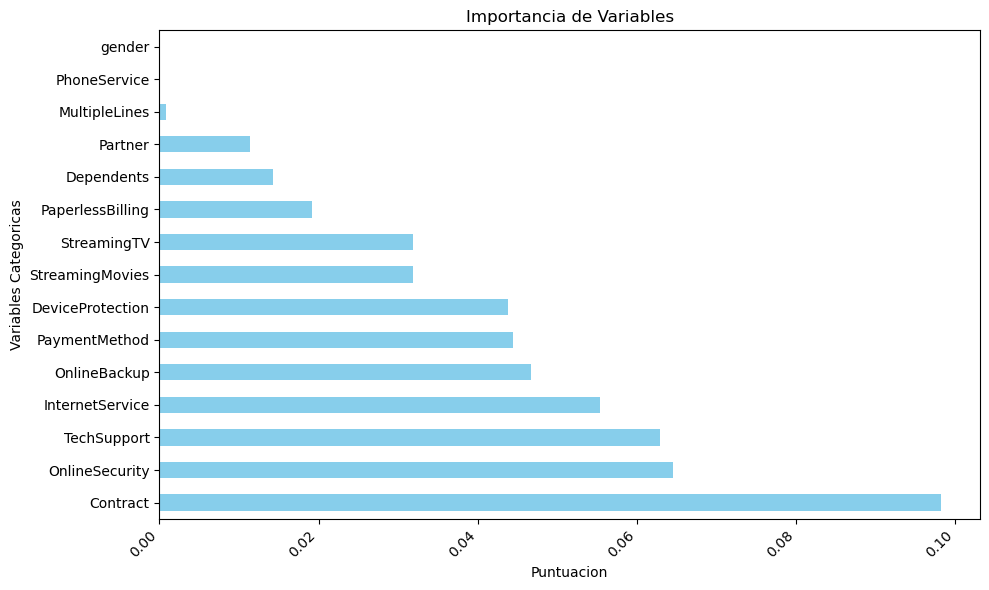

In [20]:
# Graficar los resultados anteriores
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='skyblue')
plt.title('Importancia de Variables')
plt.xlabel('Puntuacion')
plt.ylabel('Variables Categoricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Mutual information** nos permite no sólo comprender mejor nuestros datos sino también identificar las variables predictoras que son completamente independientes del objetivo. Como se muestra arriba, `gender`, `PhoneService` y `MultipleLines` tienen una puntuación de información mutua muy cercana a 0, lo que significa que esas variables no tienen una relación fuerte con el objetivo. Esta información está en línea con las conclusiones que hemos extraído previamente por medio de las visualizaciones. En los siguientes pasos, deberíamos considerar eliminar esas variables del conjunto de datos, ya que no proporcionan información útil para predecir el resultado.

# **4. Ingeniería de atributos**

### La ingeniería de atributos es el proceso de extraer características de los datos y transformarlas en un formato adecuado para el modelo de aprendizaje automático.
---

Con el análisis exploratorio de datos se identificaron las variables mas importantes para la predicción de la tasa de abandono:

- `tenure`: tiempo en meses que el cliente ha estado suscrito al servicio
- `contract`: tipo de contrato del cliente (mes a mes, contrato anual, contrato bienal)
- `InternetService`: tipo de servicio de Internet del cliente (DSL, fibra óptica, sin servicio de Internet)
- `PaymentMethod`: método de pago del cliente (transferencia bancaria, tarjeta de crédito, cheque electrónico, cheque en papel)
- `MonthlyCharges`: cargos mensuales del cliente

A partir de estas se pueden crear nuevas variables que podrían ser útiles:

- `MonthlyCharges/Tenure`: esta relacion podría indicar la rentabilidad del cliente para la compañía.
- `HasInternetService`: nueva variable binaria que representa si el cliente tiene o no servicio de internet. (Se juntarian clientes con DSL y fibra óptica)
- `NumServices`: indica la cantidad de servicios adicionales que tiene cada cliente. 

In [21]:
# Variable que calcula la relación entre el cargo mensual y la duración de la relación del cliente.
df['MthlyCharges_Tenure_Ratio'] = df['MonthlyCharges'] / df['tenure']

# Corrijo valores infinitos de la variable 'MthlyCharges_Tenure_Ratio'
df.replace([np.inf, -np.inf], np.nan, inplace=True)
mode_value = df['MthlyCharges_Tenure_Ratio'].mode()[0]
df['MthlyCharges_Tenure_Ratio'].fillna(mode_value, inplace=True)

# Variable que calcula la relación entre la duración de la relación del cliente y el cargo mensual.
df['TenureMonthlyRatio'] = df['tenure'] / df['MonthlyCharges']

In [22]:
# Crear la nueva variable 'HasInternetService' basada en 'InternetService'
df['HasInternetService'] = df['InternetService'].apply(lambda x: 'Yes' if x in ['Fiber optic', 'DSL'] else 'No')
# Verificar los valores únicos y su frecuencia en la nueva variable 'HasInternetService'
print(df['HasInternetService'].value_counts())


# Variable con la suma de servicios adicionales
internet_vars = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'HasInternetService']
df['NumServices'] = df[internet_vars].apply(lambda row: row.str.lower().replace({'yes': 1, 'no': 0, 'no internet service': 0}).astype(int).sum(), axis=1)

df.head()

HasInternetService
Yes    5512
No     1520
Name: count, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MthlyCharges_Tenure_Ratio,TenureMonthlyRatio,HasInternetService,NumServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850,0.033501,Yes,2
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,1.675,0.597015,Yes,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,26.925,0.037140,Yes,3
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer,42.30,1840.75,No,0.940,1.063830,Yes,4
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,35.350,0.028289,Yes,1


## 4.1 Codificación de etiquetas

La codificación de etiquetas se utiliza para reemplazar valores categóricos con valores numéricos. Esta codificación reemplaza cada categoría con una etiqueta numérica. En este proyecto, usaremos codificación de etiquetas con las siguientes variables binarias: `Partner`, `Dependents`, `PaperlessBilling`, `Churn`, `HasInternetService`. Las variables `gender`, `PhoneService` que tambien son binarias, seran eliminadas ya que como observamos en el calculo de importancia tienen casi cero relacion con la variable objetivo.

In [23]:
# Creo copia del dataframe original
df_transformed = df.copy()

# Eliminar columnas con baja importancia
low_importance_columns = ['gender', 'PhoneService', 'MultipleLines']
df_transformed.drop(low_importance_columns, axis=1, inplace=True)

# Codificación de etiquetas
label_encoding_columns = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'HasInternetService']

# Codificación de columnas categóricas binarias usando label encoding
for column in label_encoding_columns:
    df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0})

df_transformed.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MthlyCharges_Tenure_Ratio,TenureMonthlyRatio,HasInternetService,NumServices
0,0,1,0,1,DSL,No,Yes,No,No,No,...,Month-to-month,1,Electronic check,29.85,29.85,0,29.850,0.033501,1,2
1,0,0,0,34,DSL,Yes,No,Yes,No,No,...,One year,0,Mailed check,56.95,1889.50,0,1.675,0.597015,1,3
2,0,0,0,2,DSL,Yes,Yes,No,No,No,...,Month-to-month,1,Mailed check,53.85,108.15,1,26.925,0.037140,1,3
3,0,0,0,45,DSL,Yes,No,Yes,Yes,No,...,One year,0,Bank transfer,42.30,1840.75,0,0.940,1.063830,1,4
4,0,0,0,2,Fiber optic,No,No,No,No,No,...,Month-to-month,1,Electronic check,70.70,151.65,1,35.350,0.028289,1,1


## 4.2 Codificación One-Hot

La codificación one-hot crea una nueva columna binaria para cada nivel de la variable categórica. La nueva columna contiene ceros y unos que indican la ausencia o presencia de la categoría en los datos. En este proyecto, aplicamos codificación one-hot a las siguientes variables categóricas: `Contract`, `PaymentMethod`, `OnlineSecurity`,`OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`. La columna `InternetService`sera eliminada, ya que se usará la nueva variable creada `HasInternetService`. 

In [24]:
# Eliminar la columna 'InternetService' antes de aplicar one-hot encoding
df_transformed.drop('InternetService', axis=1, inplace=True)

# One-hot encoding (variables categoricas con mas de dos valores unicos)
one_hot_encoding_columns = ['Contract', 'PaymentMethod','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Codificar variables categóricas con más de dos niveles usando one-hot encoding
df_transformed = pd.get_dummies(df_transformed, columns=one_hot_encoding_columns)

df_transformed.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MthlyCharges_Tenure_Ratio,TenureMonthlyRatio,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,1,29.85,29.85,0,29.850,0.033501,...,False,True,False,False,True,False,False,True,False,False
1,0,0,0,34,0,56.95,1889.50,0,1.675,0.597015,...,True,True,False,False,True,False,False,True,False,False
2,0,0,0,2,1,53.85,108.15,1,26.925,0.037140,...,False,True,False,False,True,False,False,True,False,False
3,0,0,0,45,0,42.30,1840.75,0,0.940,1.063830,...,True,False,False,True,True,False,False,True,False,False
4,0,0,0,2,1,70.70,151.65,1,35.350,0.028289,...,False,True,False,False,True,False,False,True,False,False


## 4.3 Normalización

La **Normalización de Datos** es una práctica común en el aprendizaje automático que consiste en transformar datos multiescalados a la misma escala. En ML, algunos valores de características difieren entre sí varias veces. Las características con valores más altos dominarán el proceso de aprendizaje; sin embargo, no significa que esas variables sean más importantes para predecir el objetivo. Después de la normalización, todas las variables tienen una influencia similar en el modelo, mejorando la estabilidad y el rendimiento del algoritmo de aprendizaje.

En este proyecto, utilizaremos el **método min-max** para reescalar las columnas numéricas (tenure, MontlyCharges y TotalCharges) a una escala común. El enfoque min-max (a menudo llamado normalización) reescala la característica a un rango fijo de [0,1].

In [25]:
scaler = MinMaxScaler()
df_transformed[['tenure', 'MonthlyCharges', 'TotalCharges','MthlyCharges_Tenure_Ratio','TenureMonthlyRatio']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges','MthlyCharges_Tenure_Ratio','TenureMonthlyRatio']])
df_transformed.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MthlyCharges_Tenure_Ratio,TenureMonthlyRatio,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,0.000000,1,0.115423,0.001275,0,0.289503,0.006380,...,False,True,False,False,True,False,False,True,False,False
1,0,0,0,0.464789,0,0.385075,0.215867,0,0.013769,0.157830,...,True,True,False,False,True,False,False,True,False,False
2,0,0,0,0.014085,1,0.354229,0.010310,1,0.260877,0.007358,...,False,True,False,False,True,False,False,True,False,False
3,0,0,0,0.619718,0,0.239303,0.210241,0,0.006576,0.283290,...,True,False,False,True,True,False,False,True,False,False
4,0,0,0,0.014085,1,0.521891,0.015330,1,0.343328,0.004979,...,False,True,False,False,True,False,False,True,False,False


# **5. Entrenamiento y Testeo**

---

El primer paso al construir un modelo es **dividir los datos en dos grupos**, que normalmente se denominan conjuntos de **entrenamiento** y **prueba**. El algoritmo de aprendizaje automático utiliza el conjunto de entrenamiento para construir el modelo. El conjunto de prueba contiene muestras que no formaron parte del proceso de aprendizaje y se utilizan para evaluar el rendimiento del modelo. Es importante evaluar la calidad del modelo utilizando datos no vistos en entrenamiento para garantizar una evaluación objetiva.

Primero, creamos una variable `X` para almacenar los atributos independientes del conjunto de datos. Además, creamos una variable `y` para almacenar solo la variable objetivo (Churn).

## 5.1 Seleccion de datos

In [26]:
# Seleccionamos las variables independientes
X = df_transformed.drop(columns='Churn')

# Seleccionamos la variable dependiente
y = df_transformed.loc[:, 'Churn']

# Verificamos que las variables fueron seleccionadas correctamente
print(X.columns)

# Verificamos que las variables fueron seleccionadas correctamente
print(y.name)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'MthlyCharges_Tenure_Ratio',
       'TenureMonthlyRatio', 'HasInternetService', 'NumServices',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes'],
      dtype='object')
Churn


## 5.2 División de datos

In [27]:
# Division de la BD en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Este código dividirá el conjunto de datos en un 80% para entrenamiento `(X_train y y_train)` y un 20% para prueba `(X_test y y_test)`. Además, al establecer `random_state=42`, se garantiza que la división se realice de manera consistente cada vez que se ejecute el código, lo que facilita la reproducibilidad de los resultados. La opción `shuffle=True` garantiza que los datos se barajen aleatoriamente antes de la división, lo que puede ayudar a evitar cualquier sesgo en la selección de los conjuntos.

## 5.3 Entrenamiento y evaluación de modelos:

In [28]:
def create_models(seed=42):
    '''
    Crea una lista de modelos de aprendizaje automático.
            Parámetros:
                    seed (entero): semilla aleatoria de los modelos
            Retorna:
                    models (lista): lista que contiene los modelos
    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed,max_iter=1000)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models

# crea una lista con todos los algoritmos que vamos a evaluar
models = create_models()

Con el codigo anterior configuramos una lista de modelos de aprendizaje automático para su evaluación. Los modelos seleccionados son los siguientes:

- `Dummy Classifier`: Este modelo es útil como línea de base, ya que predice la clase más frecuente en el conjunto de datos de entrenamiento. Es útil para comparar la eficacia de otros modelos con respecto a una predicción aleatoria o ingenua.

- `K Nearest Neighbors (KNN)`: Este modelo se utiliza para clasificación y puede ser efectivo en la predicción de clases en función de la similitud con instancias vecinas en el espacio de características.

- `Regresión Logística`: Es un modelo lineal utilizado para problemas de clasificación binaria que estima la probabilidad de que una instancia pertenezca a una clase particular.

- `Support Vector Machines (SVM)`: Es un modelo versátil que puede ser útil tanto para problemas de clasificación lineal como no lineal al encontrar el hiperplano que mejor separa las clases en el espacio de características.

- `Random Forest`: Este es un modelo de conjunto que utiliza múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste.

- `Gradient Boosting`: Es otro modelo de conjunto que construye los modelos en forma de árboles de decisión en serie, donde cada árbol intenta corregir los errores del anterior, lo que puede resultar en una alta precisión predictiva.

In [29]:
# probar la precisión de cada modelo usando hiperparámetros predeterminados
resultados = []
nombres = []
puntuacion = 'accuracy'
for nombre, modelo in models:
    # ajustar el modelo con los datos de entrenamiento
    modelo.fit(X_train, y_train).predict(X_test)
    # hacer predicciones con los datos de prueba
    predicciones = modelo.predict(X_test)
    # calcular la precisión
    precision = accuracy_score(y_test, predicciones)
    # agregar el nombre del modelo y la precisión a las listas
    resultados.append(precision)
    nombres.append(nombre)
    # imprimir la precisión del clasificador
    print('Clasificador: {}, Precisión: {})'.format(nombre, precision))



Clasificador: dummy_classifier, Precisión: 0.7341862117981521)
Clasificador: k_nearest_neighbors, Precisión: 0.7533759772565742)
Clasificador: logistic_regression, Precisión: 0.783226723525231)
Clasificador: support_vector_machines, Precisión: 0.7803837953091685)
Clasificador: random_forest, Precisión: 0.7789623312011372)
Clasificador: gradient_boosting, Precisión: 0.7995735607675906)


Como se observa en el resultado anterior, todos los modelos superan al modelo **dummy_classifier** en términos de precisión de predicción. Por tanto, podemos afirmar que el aprendizaje automático es aplicable a nuestro problema porque observamos una mejora con respecto a la línea base.

En general, parece que el modelo de **Gradient Boosting** tiene la mayor precisión en este conjunto de datos, seguido de la **Regresión Logística**. Sin embargo, es importante recordar que la precisión no es la única métrica a considerar al evaluar un modelo, y puede ser útil examinar otras métricas 

## 5.4 Validacion Cruzada:

In [30]:
# Función para evaluar los modelos mediante validación cruzada
def evaluate_models(models, X, y, scoring='accuracy', cv=5):
    '''
    Evalúa varios modelos utilizando validación cruzada.
    
    Parámetros:
        - models (list): Lista de tuplas (nombre, modelo) de los modelos a evaluar.
        - X (DataFrame): Features.
        - y (Series): Target.
        - scoring (str): Métrica de evaluación (por defecto 'accuracy').
        - cv (int): Número de divisiones para la validación cruzada (por defecto 5).
    
    Retorna:
        - scores (dict): Diccionario con los nombres de los modelos y sus puntuaciones de validación cruzada.
    '''
    scores = {}
    for name, model in models:
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        scores[name] = cv_scores
        print(f'{name}: Mean {scoring}: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})')
    return scores

# Evaluar los modelos
scores = evaluate_models(models, X, y)


dummy_classifier: Mean accuracy: 0.7342 (+/- 0.0003)
k_nearest_neighbors: Mean accuracy: 0.7622 (+/- 0.0072)
logistic_regression: Mean accuracy: 0.7993 (+/- 0.0067)
support_vector_machines: Mean accuracy: 0.7961 (+/- 0.0059)
random_forest: Mean accuracy: 0.7834 (+/- 0.0089)
gradient_boosting: Mean accuracy: 0.8029 (+/- 0.0108)


Los resultados muestran la precisión media y la variabilidad (desviación estándar) de cada modelo en la clasificación de los datos. Aquí hay algunas observaciones:

- `dummy_classifier`: Este modelo, que simplemente predice la clase más frecuente en el conjunto de entrenamiento, tiene una precisión media de aproximadamente 73.42%, con una baja variabilidad.

- `k_nearest_neighbors`: Con una precisión media de alrededor del 76.22%, es ligeramente superior al dummy classifier, pero con una mayor variabilidad, indicada por una desviación estándar de aproximadamente 0.0072.

- `logistic_regression`: La regresión logística alcanza una precisión media de aproximadamente 79.93%, mostrando un rendimiento más sólido en comparación con los modelos anteriores y una variabilidad moderada.

- `support_vector_machines`: Los vectores de soporte obtienen una precisión media similar a la regresión logística, alrededor del 79.61%, con una variabilidad ligeramente menor.

- `random_forest`: Muestra una precisión media de aproximadamente 78.34%, con una variabilidad más alta en comparación con la regresión logística y los vectores de soporte.

- `gradient_boosting`: Con una precisión media de alrededor del **80.29%**, este modelo muestra el mejor rendimiento entre los probados, con una variabilidad ligeramente más alta que la regresión logística.

En resumen, el modelo `gradient_boosting` parece ser el más prometedor en términos de precisión media, pero su variabilidad también es importante considerar. `logistic_regression` también muestra un rendimiento sólido con una variabilidad moderada. Los resultados sugieren que estos dos modelos podrían ser los más adecuados para continuar con un ajuste más detallado y una evaluación exhaustiva.

# **6. Optimización del/los modelo(s)**

---

Es importante tener en cuenta que hemos entrenado todos los algoritmos utilizando los hiperparámetros predeterminados. La precisión de muchos algoritmos de aprendizaje automático es muy sensible a los hiperparámetros elegidos para entrenar el modelo. A continuación realizaremos la evaluación de una gama más amplia de hiperparámetros (no solo valores predeterminados) antes de elegir un modelo (o modelos) para el ajuste de hiperparámetros.

Este código buscará los mejores hiperparámetros para `Gradient Boosting` y `logistic_regression` utilizando `RandomizedSearchCV` y los rangos de hiperparámetros especificados en `param_dist_gradient_boosting` y `param_dist_logistic_regression`, respectivamente. Los resultados se imprimirán en la consola. 

In [31]:
seed = 42  # Definir una semilla para la reproducibilidad de los resultados
# Definir los hiperparámetros a ajustar para Gradient Boosting
param_dist_gradient_boosting = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [80, 90, 100, 110, 120, 150],
    'min_samples_split': [2, 3, 4, 5, 10],
    'max_features': [1.0, 'sqrt', 'log2']
}

# Definir los hiperparámetros a ajustar para Regresión Logística
param_dist_logistic_regression = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 1500, 2000],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'tol': [1e-3, 1e-4, 1e-5],
    'class_weight': [None, 'balanced']
}

# Realizar la búsqueda de hiperparámetros para Gradient Boosting
random_search_gradient_boosting = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=seed),
    param_distributions=param_dist_gradient_boosting,
    n_iter=400,
    cv=5,
    scoring='accuracy',
    random_state=seed
)
random_search_gradient_boosting.fit(X_train, y_train)

# Realizar la búsqueda de hiperparámetros para Regresión Logística
random_search_logistic_regression = RandomizedSearchCV(
    LogisticRegression(random_state=seed),
    param_distributions=param_dist_logistic_regression,
    n_iter=400,
    cv=5,
    scoring='accuracy',
    random_state=seed
)
random_search_logistic_regression.fit(X_train, y_train)

# Obtener los mejores hiperparámetros para cada modelo
best_params_gradient_boosting = random_search_gradient_boosting.best_params_
best_params_logistic_regression = random_search_logistic_regression.best_params_

print("Mejores hiperparámetros para gradient_boosting:", best_params_gradient_boosting)
print("Mejores hiperparámetros para logistic_regression:", best_params_logistic_regression)


C:\Users\Alex\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 270 is smaller than n_iter=300. Running 270 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Alex\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Alex\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Alex\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Alex\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Alex\miniconda3\Lib\site-packages\skl

C:\Users\Alex\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Alex\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Alex\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Mejores hiperparámetros para gradient_boosting: {'n_estimators': 120, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.05}
Mejores hiperparámetros para logistic_regression: {'tol': 0.001, 'solver': 'saga', 'max_iter': 1000, 'class_weight': None, 'C': 10}


El código realizó una búsqueda de hiperparámetros utilizando la técnica de búsqueda aleatoria para el modelo de Gradient Boosting y Regresión Logística. Se uso el metodo aleatorio ya que es mas eficiente computacionalmente. Se exploraron diferentes combinaciones de hiperparámetros dentro de rangos predefinidos para encontrar los que maximizan la precisión del modelo en datos no vistos. Los resultados muestran los mejores conjuntos de hiperparámetros encontrados para cada modelo.

En esta etapa usaremos los hiperparametros obtenidos en el paso anterior, para hacer un ajuste fino de los modelos `Gradient Boosting` y `Logistic Regression`; posteriormente volveremos a hacer una validacion cruzada para comparar si obtuvimos mejoras en la precisión vs cuando usamos los hiperparametros por defecto.

In [32]:
# Configurar los modelos con los hiperparámetros óptimos
best_gradient_boosting = GradientBoostingClassifier(n_estimators=120, min_samples_split=10, max_features='log2', max_depth=4, learning_rate=0.05)
best_logistic_regression = LogisticRegression(tol=0.001, solver='saga', penalty='l2', max_iter=1000, class_weight=None, C=10)

# Realizar la validación cruzada para Gradient Boosting
gradient_boosting_scores = cross_val_score(best_gradient_boosting, X_train, y_train, cv=5, scoring='accuracy')
print("Precisión de validación cruzada para Gradient Boosting: {:.4f} (+/- {:.4f})".format(gradient_boosting_scores.mean(), gradient_boosting_scores.std() * 2))

# Realizar la validación cruzada para Regresión Logística
logistic_regression_scores = cross_val_score(best_logistic_regression, X_train, y_train, cv=5, scoring='accuracy')
print("Precisión de validación cruzada para Regresión Logística: {:.4f} (+/- {:.4f})".format(logistic_regression_scores.mean(), logistic_regression_scores.std() * 2))

Precisión de validación cruzada para Gradient Boosting: 0.8023 (+/- 0.0115)
Precisión de validación cruzada para Regresión Logística: 0.8023 (+/- 0.0222)


Comparando los resultados con los hiperparámetros por defecto y después de la búsqueda y ajuste de hiperparámetros, se observa una mejora en la precisión de validación cruzada para ambos modelos. En el caso de la Regresión Logística, la precisión aumentó ligeramente de 0.7993 a 0.8023, con un aumento notable en el intervalo de confianza de +/- 0.0067 a +/- 0.0222, lo que indica una mayor estabilidad. Para el Gradient Boosting, la precisión se mantuvo en 0.8023, con un ligero aumento en el intervalo de confianza de +/- 0.0108 a +/- 0.0115, lo que sugiere una mayor consistencia en el rendimiento. 

Con el siguiente codigo, hemos creado un ensamblaje de dos modelos buscando que al combinar las predicciones de ambos podamos mejorar el rendimiento general; el modelo de Gradient Boosting sumado al de Regresión Logística. Hemos utilizado la clase `VotingClassifier` para esta tarea y hacer predicciones mediante votación directa ('hard'). 

In [33]:
# Definir los modelos base
model_gb = GradientBoostingClassifier(n_estimators=120, min_samples_split=10, max_features='log2', max_depth=4, learning_rate=0.05)
model_lr = LogisticRegression(tol=0.001, solver='saga', penalty='l2', max_iter=1000, class_weight=None, C=10)

# Crear el ensamblaje de modelos
ensemble_model = VotingClassifier(estimators=[
    ('gradient_boosting', model_gb),
    ('logistic_regression', model_lr)
], voting='hard')

# Entrenar el ensamblaje de modelos
ensemble_model.fit(X_train, y_train)

# Calcular la precisión del ensamblaje mediante validación cruzada
ensemble_scores = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar la precisión promedio y la desviación estándar de la precisión
print("Precisión del ensamblaje mediante validación cruzada: {:.4f} (+/- {:.4f})".format(ensemble_scores.mean(), ensemble_scores.std()))

Precisión del ensamblaje mediante validación cruzada: 0.8005 (+/- 0.0101)


Comparando los resultados del ensamblaje con los modelos individuales, observamos que la precisión media del ensamblaje (0.8005) se sitúa entre las precisión obtenidas por los modelos individuales: 0.8023 para Regresión Logística y 0.8023 para Gradient Boosting. Sin embargo, el intervalo de confianza del ensamblaje (±0.0101) es más estrecho que el de ambos modelos individuales, lo que sugiere que el ensamblaje tiene una menor variabilidad en el rendimiento y potencialmente una mayor robustez en la predicción.

# **7. Seleccion y prueba del modelo**

---

In [34]:
# Hacer predicciones en los datos de prueba utilizando el modelo ensamblado
y_pred = ensemble_model.predict(X_test)

# Calcular diferentes métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar las métricas de evaluación
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7839
Precision: 0.6346
Recall: 0.4412
F1 Score: 0.5205
Confusion Matrix:
 [[938  95]
 [209 165]]


Al realizar predicciones en el conjunto de datos de prueba utilizando el modelo ensamblado y posteriormente al calcular las diferentes métricas de evaluación, entre las que se incluyen precisión, recall, F1-score y la matriz de confusión. Los resultados muestran que el modelo alcanza una precisión del 78.39%, lo que significa que el 78.39% de las predicciones son correctas. La precisión, que indica la proporción de predicciones positivas correctas sobre todas las predicciones positivas, es del 63.46%, mientras que el recall, que mide la proporción de verdaderos positivos identificados correctamente respecto a todos los casos positivos reales, es del 44.12%. El puntaje F1, que es la media armónica entre precisión y recall, es del 52.05%. La matriz de confusión muestra que hay 938 verdaderos negativos, 95 falsos positivos, 209 falsos negativos y 165 verdaderos positivos. Estos resultados proporcionan una visión general del rendimiento del modelo en la clasificación de las clases positivas y negativas.El rendimiento actual parece ser aceptable pero podría ser mejor.

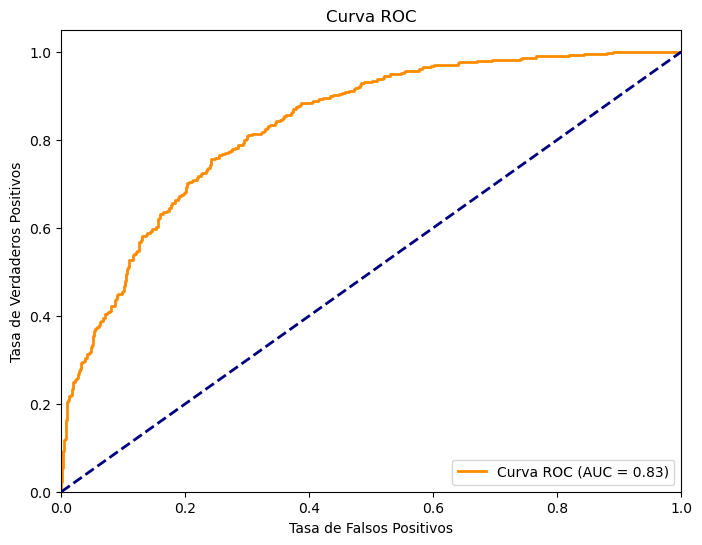

In [40]:
# Cambiar el tipo de votación a suave ('soft')
ensemble_model.voting = 'soft'

# Calcular las probabilidades de predicción para las clases
y_pred_proba = ensemble_model.predict_proba(X_test)

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y el umbral utilizando las probabilidades de predicción
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Basándonos en los resultados proporcionados, podemos decir sobre el rendimiento general del modelo lo siguiente:

AUC Score: El valor del área bajo la curva ROC (AUC) es de 0.83, lo cual indica que el modelo tiene una buena capacidad para distinguir entre clases positivas y negativas. Un AUC de 1.0 sería perfecto, mientras que 0.5 indicaría un rendimiento aleatorio.

En general, el modelo parece tener un buen rendimiento, especialmente en términos de AUC y tasas de falsos positivos y verdaderos positivos.

# **8. Resumen**

---

Como resumen final;  en este proyecto se trabajó con un conjunto de datos que contiene información de clientes de una compañía de telecomunicaciones, con el objetivo de predecir la tasa de abandono. A través de un análisis exploratorio de datos, se identificaron varios factores que influyen en la tasa de abandono de los clientes, como la duración del contrato, el cargo mensual y el tipo de servicio contratado. Comenzamos limpiando los datos y analizándolos con visualizaciónes. Luego, para poder construir un modelo de aprendizaje automático, transformamos los datos categóricos en variables numéricas (ingeniería de características) y creamos nuevas columnas. Después de transformar los datos, probamos 6 algoritmos de aprendizaje automático diferentes utilizando parámetros predeterminados. Finalmente, combinamos los dos mejores modelos resultantes y ajustamos los hiperparámetros de ambos para la optimización del modelo combinado, obteniendo una precisión de casi el 80% (cerca de un 6% más que la línea de base).